In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Load the dataset
file_path = "/content/digital_marketing_campaign_dataset.csv"
data = pd.read_csv(file_path)

# Step 2: Generate Synthetic Data

# 2.1. Funnel Variant: Randomly assign "A" or "B" for A/B testing
np.random.seed(42)
data['Funnel Variant'] = np.random.choice(['A', 'B'], size=len(data))

# 2.2. Funnel Stage Conversions: Simulate conversion data for 5 stages in the funnel
n_stages = 5
for stage in range(1, n_stages + 1):
    # We'll assume that the conversion probability decreases with each stage
    data[f'Stage {stage} Conversion'] = np.random.binomial(1, p=1 - 0.1 * stage, size=len(data))

# 2.3. Customer Lifetime Value (CLV): Generate synthetic CLV values (between 100 and 1000)
data['CLV'] = np.random.uniform(100, 1000, size=len(data))

# Step 3: Save the updated dataset with synthetic columns
data.to_csv("satyam_digital_marketing_campaign_with_synthetic_data.csv", index=False)

# Step 4: Display the updated dataset (or first few rows)
print(data.head())

   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  AdvertisingPlatform  \
0          0.043919        0.088031              0  ...             IsConfid   
1          0.155725        0.182725             42  ...             IsConfid   
2          0.277490        0.076423              2  ...             IsConfid   
3          0.137611        0.088004             47  ...             IsConfid   
4          0.252851        0.109940              0  ...             IsConfid   

   AdvertisingTool  Conversion  Funnel

Overall Conversion Rate: 87.65%

Conversion Rate by Funnel Variant:
Funnel Variant
A    0.880378
B    0.872581
Name: Conversion, dtype: float64


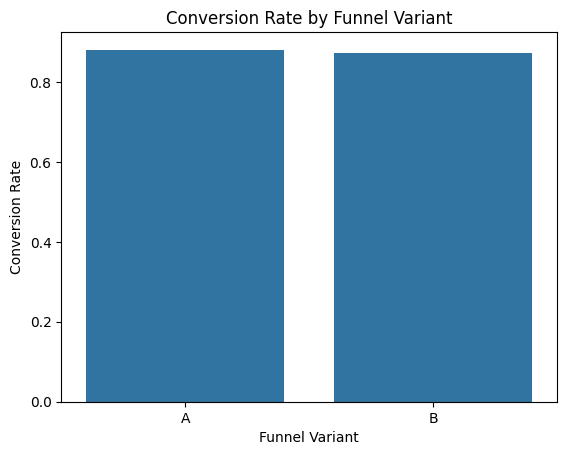


Conversion Rates by Funnel Stage:
Stage 1 Conversion    0.90175
Stage 2 Conversion    0.79900
Stage 3 Conversion    0.69825
Stage 4 Conversion    0.60275
Stage 5 Conversion    0.49650
dtype: float64


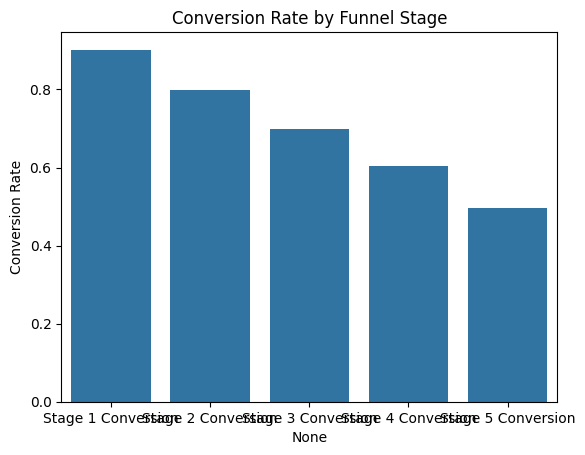

In [ ]:
# Calculate overall conversion rate
overall_conversion_rate = data['Conversion'].mean()
print(f"Overall Conversion Rate: {overall_conversion_rate * 100:.2f}%")

# Conversion rate by Funnel Variant (A vs B)
conversion_rate_by_funnel_variant = data.groupby('Funnel Variant')['Conversion'].mean()
print("\nConversion Rate by Funnel Variant:")
print(conversion_rate_by_funnel_variant)

# Plot conversion rates by Funnel Variant
sns.barplot(x=conversion_rate_by_funnel_variant.index, y=conversion_rate_by_funnel_variant.values)
plt.title('Conversion Rate by Funnel Variant')
plt.ylabel('Conversion Rate')
plt.show()

# Calculate conversion rates at each funnel stage
funnel_stage_columns = [f'Stage {i} Conversion' for i in range(1, 6)]
stage_conversion_rates = data[funnel_stage_columns].mean()

print("\nConversion Rates by Funnel Stage:")
print(stage_conversion_rates)

# Plot conversion rates at each funnel stage
sns.barplot(x=stage_conversion_rates.index, y=stage_conversion_rates.values)
plt.title('Conversion Rate by Funnel Stage')
plt.ylabel('Conversion Rate')
plt.show()


Drop-off Rates by Funnel Stage:
Stage 1 Conversion    0.09825
Stage 2 Conversion    0.20100
Stage 3 Conversion    0.30175
Stage 4 Conversion    0.39725
Stage 5 Conversion    0.50350
dtype: float64


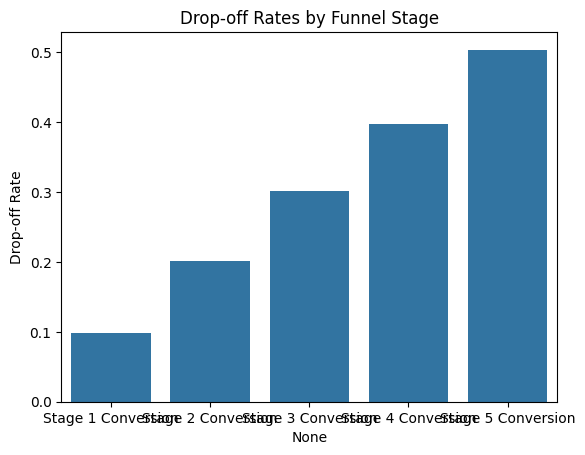

In [ ]:
# Calculate drop-off rates for each funnel stage
drop_off_rates = 1 - stage_conversion_rates
print("\nDrop-off Rates by Funnel Stage:")
print(drop_off_rates)

# Plot drop-off rates at each funnel stage
sns.barplot(x=drop_off_rates.index, y=drop_off_rates.values)
plt.title('Drop-off Rates by Funnel Stage')
plt.ylabel('Drop-off Rate')
plt.show()


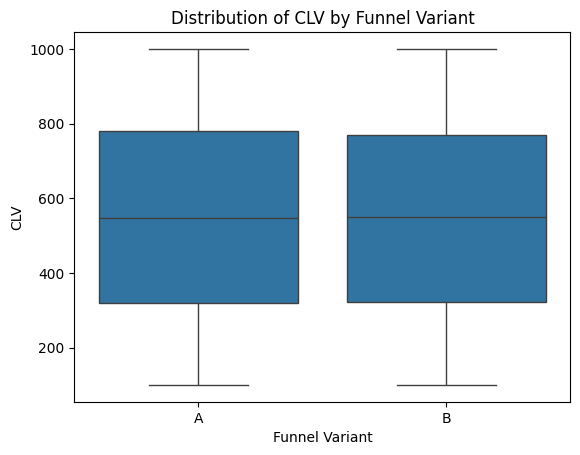


Average CLV by Funnel Variant:
Funnel Variant
A    550.177212
B    548.025220
Name: CLV, dtype: float64

Correlation between CLV and Conversion:
                 CLV  Conversion
CLV         1.000000    0.002086
Conversion  0.002086    1.000000


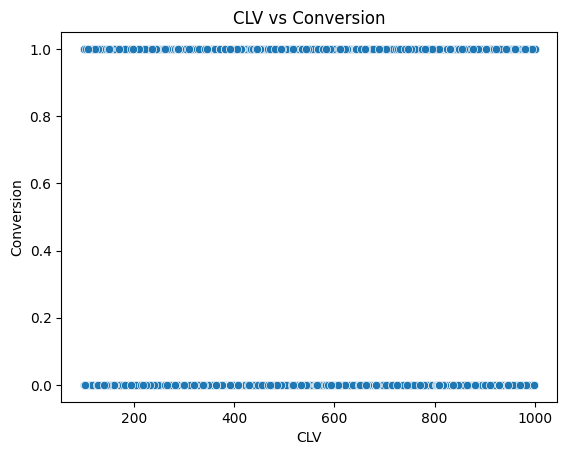

In [ ]:
# Plot distribution of CLV by Funnel Variant
sns.boxplot(x='Funnel Variant', y='CLV', data=data)
plt.title('Distribution of CLV by Funnel Variant')
plt.show()

# Calculate and compare average CLV for each Funnel Variant
average_clv_by_funnel_variant = data.groupby('Funnel Variant')['CLV'].mean()
print("\nAverage CLV by Funnel Variant:")
print(average_clv_by_funnel_variant)

# Correlation between CLV and Conversion
clv_conversion_corr = data[['CLV', 'Conversion']].corr()
print("\nCorrelation between CLV and Conversion:")
print(clv_conversion_corr)

# Plot CLV vs Conversion
sns.scatterplot(x='CLV', y='Conversion', data=data)
plt.title('CLV vs Conversion')
plt.show()


In [ ]:
# Perform a t-test to compare conversion rates between Funnel A and Funnel B
funnel_A_conversions = data[data['Funnel Variant'] == 'A']['Conversion']
funnel_B_conversions = data[data['Funnel Variant'] == 'B']['Conversion']

t_stat, p_value = stats.ttest_ind(funnel_A_conversions, funnel_B_conversions)
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion of the t-test
if p_value < 0.05:
    print("The difference in conversion rates between Funnel A and Funnel B is statistically significant.")
else:
    print("The difference in conversion rates between Funnel A and Funnel B is not statistically significant.")



T-statistic: 1.0597
P-value: 0.2893
The difference in conversion rates between Funnel A and Funnel B is not statistically significant.



Feature Importance:
                Feature  Importance
9         PagesPerVisit    0.080669
10           TimeOnSite    0.080298
6      ClickThroughRate    0.078959
7        ConversionRate    0.078665
15        LoyaltyPoints    0.076897
5               AdSpend    0.075414
8         WebsiteVisits    0.064269
12           EmailOpens    0.062586
14    PreviousPurchases    0.056143
2                Income    0.055787
23                  CLV    0.053202
13          EmailClicks    0.053131
11         SocialShares    0.048316
0                   Age    0.044733
4          CampaignType    0.022502
3       CampaignChannel    0.022080
22   Stage 5 Conversion    0.009795
1                Gender    0.008351
21   Stage 4 Conversion    0.008350
20   Stage 3 Conversion    0.007410
19   Stage 2 Conversion    0.007210
18   Stage 1 Conversion    0.005232
16  AdvertisingPlatform    0.000000
17      AdvertisingTool    0.000000


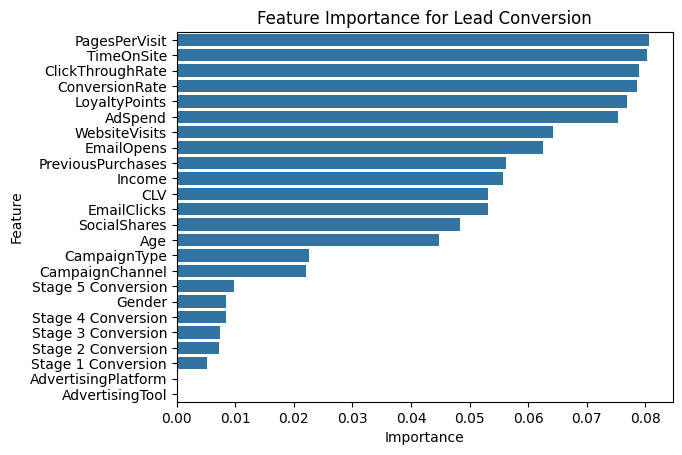

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/content/satyam_digital_marketing_campaign_with_synthetic_data.csv")

# Apply Label Encoding to all categorical columns
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Now, proceed with the model training
# Prepare data for training the model
X = data.drop(columns=['Conversion', 'CustomerID', 'Funnel Variant'])
y = data['Conversion']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importances
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Lead Conversion')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.08      0.14       194
           1       0.89      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.80      0.54      0.54      1600
weighted avg       0.87      0.88      0.84      1600

Confusion Matrix:
[[  15  179]
 [   6 1400]]
AUC Score: 0.8179


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is loaded into `data` and CLV is already in the data
data = pd.read_csv("/content/satyam_digital_marketing_campaign_with_synthetic_data.csv")

# Step 1: Determine the CLV percentile thresholds for segmentation
# You can define these thresholds manually or use percentiles (e.g., Top 20% = High, Next 30% = Medium, etc.)

# Calculate the percentiles for CLV
clv_percentiles = np.percentile(data['CLV'], [20, 50, 80])  # 20th, 50th, 80th percentiles

# Step 2: Create CLV segments
def clv_segment(clv):
    if clv <= clv_percentiles[0]:
        return 'Low Value'
    elif clv <= clv_percentiles[1]:
        return 'Medium Value'
    else:
        return 'High Value'

# Apply the segmentation function to the CLV column
data['CLV Segment'] = data['CLV'].apply(clv_segment)

# Step 3: View the segmented data
print(data[['CustomerID', 'CLV', 'CLV Segment']].head())

# Optional: View the distribution of CLV segments
print(data['CLV Segment'].value_counts())


   CustomerID         CLV CLV Segment
0        8000  624.960667  High Value
1        8001  898.837226  High Value
2        8002  786.610749  High Value
3        8003  880.665058  High Value
4        8004  153.480301   Low Value
CLV Segment
High Value      4000
Medium Value    2400
Low Value       1600
Name: count, dtype: int64



Attribution Model - Channel Contributions:
EmailClicks           2.826782
SocialShares         31.511350
WebsiteVisits        15.661868
Attribution_Score    50.000000
dtype: float64


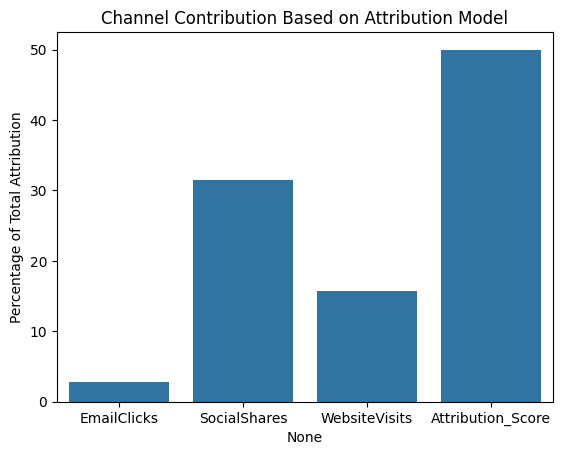

In [ ]:
# Assume data contains columns 'EmailClicks', 'SocialShares', 'WebsiteVisits', and 'Conversion'

# Let's assume each channel gets equal credit in the linear attribution model

# Create a new column for attribution score (sum of the touchpoints for each customer)
data['Attribution_Score'] = data['EmailClicks'] + data['SocialShares'] + data['WebsiteVisits']

# Calculate the contribution of each channel
channel_contributions = data[['EmailClicks', 'SocialShares', 'WebsiteVisits', 'Attribution_Score']].mean()

# Normalize the attribution score (to sum up to 100%)
channel_contributions_normalized = (channel_contributions / channel_contributions.sum()) * 100

# Display the attribution contribution
print("\nAttribution Model - Channel Contributions:")
print(channel_contributions_normalized)

# Plot the contribution of each channel
sns.barplot(x=channel_contributions_normalized.index, y=channel_contributions_normalized.values)
plt.title('Channel Contribution Based on Attribution Model')
plt.ylabel('Percentage of Total Attribution')
plt.show()



Customer Engagement Segments:
   CustomerID Engagement_Segment  Engagement_Score
0        8000                Low          7.626351
1        8001                Low          2.093435
2        8002                Low          0.166494
3        8003               High         35.682567
4        8004                Low          2.551711


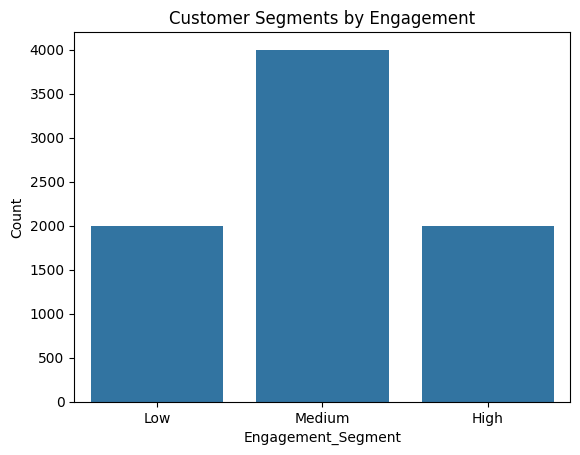

In [ ]:
# Assume that 'ClickThroughRate' and 'SocialShares' are in the dataset

# Create engagement scores based on Click-Through Rate and Social Shares
data['Engagement_Score'] = data['ClickThroughRate'] * 0.6 + data['SocialShares'] * 0.4  # Weighted sum

# Define thresholds to segment customers into High, Medium, and Low Engagement
high_engagement_threshold = data['Engagement_Score'].quantile(0.75)
low_engagement_threshold = data['Engagement_Score'].quantile(0.25)

# Assign engagement categories
data['Engagement_Segment'] = pd.cut(data['Engagement_Score'],
                                     bins=[-np.inf, low_engagement_threshold, high_engagement_threshold, np.inf],
                                     labels=['Low', 'Medium', 'High'])

# Display segmentation result
print("\nCustomer Engagement Segments:")
print(data[['CustomerID', 'Engagement_Segment', 'Engagement_Score']].head())

# Plot Engagement Segments
sns.countplot(x='Engagement_Segment', data=data)
plt.title('Customer Segments by Engagement')
plt.ylabel('Count')
plt.show()



Customer Segmentation Based on Loyalty Points:
   CustomerID Loyalty_Segment  LoyaltyPoints
0        8000             Low            688
1        8001             Low           3459
2        8002             Low           2337
3        8003             Low           2463
4        8004            High           4345


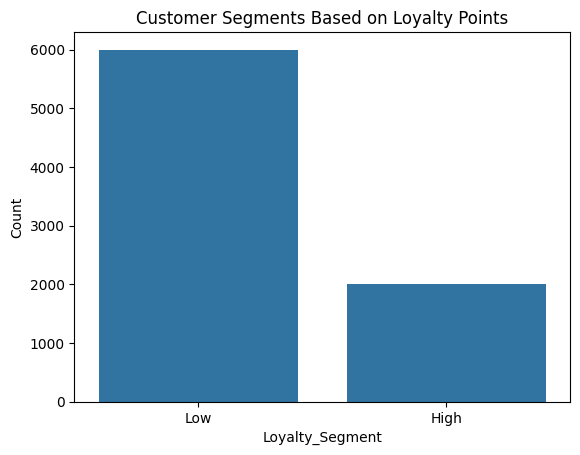

In [ ]:
# Let's assume 'PreviousPurchases' and 'LoyaltyPoints' are in the dataset

# Segment customers based on loyalty points
high_loyalty_threshold = data['LoyaltyPoints'].quantile(0.75)

# Assign loyalty categories
data['Loyalty_Segment'] = np.where(data['LoyaltyPoints'] > high_loyalty_threshold, 'High', 'Low')

# Display customers in different loyalty segments
print("\nCustomer Segmentation Based on Loyalty Points:")
print(data[['CustomerID', 'Loyalty_Segment', 'LoyaltyPoints']].head())

# Plot loyalty segments
sns.countplot(x='Loyalty_Segment', data=data)
plt.title('Customer Segments Based on Loyalty Points')
plt.ylabel('Count')
plt.show()
